In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


# Data Preparation & Transformation


---



**Step 1. Data Preparation**


*   Concatnenate stock data of 10 companies selected as independent variables into one dataframe 'df_X'
*   Add index & Company name




*   Concatnate stock data of 4 pharmaceutical ETFs selected as explanatory variables into one dataframe 'df_Y'
*   Add index & ETF name







In [2]:
#Import ETF datasets from Github

ihe = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/IHE.csv'))
pjp = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/PJP.csv'))
pph = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/PPH.csv'))
xph = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/XPH.csv'))

#IHE['Name'] = 'IHE'
#PJP['Name'] = 'PJP'
#PPH['Name'] = 'PPH'
#XPH['Name'] = 'XPH'


In [ ]:
#inspect one Y dataset
pph.describe()
pph.head(-5)

In [4]:
#Get X datasets from github
url1 = 'https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/ABBV.csv'
abbv = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/AZN.csv'
azn = pd.read_csv(url2)

url3 = 'https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/GSK.csv'
gsk = pd.read_csv(url3)

url4 = 'https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/JNJ.csv'
jnj = pd.read_csv(url4)

url5 = 'https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/MRK.csv'
mrk = pd.read_csv(url5)

url6 = 'https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/NVS.csv'
nvs = pd.read_csv(url6)

url7 = 'https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/PFE.csv'
pfe = pd.read_csv(url7)

url8 = 'https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/RHHBY.csv'
rhhby = pd.read_csv(url8)

url9 = 'https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/SNY.csv'
sny = pd.read_csv(url9)

url10 = 'https://raw.githubusercontent.com/melody199810/Pharmaceutical_Sector_Index/main/TAK.csv'
tak = pd.read_csv(url10)

In [ ]:
#inspect one X dataset
tak.describe()
tak.head(-5)

**Step 2. X: Percent Change Daily of Closing Prices**

*   Create Dataframe of closing prices of 10 companies
*   Calculate percent change w/ Timeseries






In [7]:
# dictionary of closing prices to dataframe

closingPrices_X = {'ABBV': abbv['Close'],'AZN': azn['Close'], 'GSK': gsk['Close'],
                 'JNJ': jnj['Close'], 'MRK': mrk['Close'], 'NVS': nvs['Close'], 
                 'PFE': pfe['Close'], 'RHHBY': rhhby['Close'], 
                 'SNY': sny['Close'], 'TAK': tak['Close']}

df_Close_X = pd.DataFrame(data = closingPrices_X)

print("DataFrame contents: Closing prices of stocks")
print(df_Close_X)

DataFrame contents: Closing prices of stocks
           ABBV        AZN        GSK  ...      RHHBY        SNY        TAK
0     75.730003  44.310001  37.910000  ...  41.650002  46.119999  15.850000
1     75.389999  43.099998  37.529999  ...  40.020000  44.599998  16.059999
2     78.559998  43.849998  38.080002  ...  40.349998  45.180000  16.049999
3     79.750000  44.660000  38.880001  ...  39.750000  45.459999  16.709999
4     80.300003  47.360001  38.939999  ...  39.389999  44.380001  16.850000
..          ...        ...        ...  ...        ...        ...        ...
246  106.730003  50.810001  36.689999  ...  40.380001  49.630001  18.350000
247  106.790001  49.970001  36.369999  ...  40.250000  49.110001  18.260000
248  108.220001  49.720001  35.689999  ...  40.560001  49.459999  18.639999
249  108.519997  49.529999  35.820000  ...  40.770000  49.360001  18.200001
250  106.139999  49.529999  36.080002  ...  41.450001  50.180000  17.850000

[251 rows x 10 columns]


In [8]:
# % change
percentChange_X = df_Close_X.pct_change()
print("Percentage Change for closing prices of the company stocks:")
percentChange_X.dropna(inplace = True)
percentChange_X

Percentage Change for closing prices of the company stocks:


,ABBV,AZN,GSK,JNJ,MRK,NVS,PFE,RHHBY,SNY,TAK
1,-0.004490,-0.027308,-0.010024,-0.016314,-0.021791,-0.020296,-0.027770,-0.039136,-0.032958,0.013249
2,0.042048,0.017401,0.014655,0.042042,0.038951,0.019407,0.029455,0.008246,0.013005,-0.000623
3,0.015148,0.018472,0.021008,-0.014170,0.010659,-0.008993,0.022832,-0.014870,0.006197,0.041121
4,0.006897,0.060457,0.001543,-0.010338,-0.023639,-0.007661,-0.007064,-0.009057,-0.023757,0.008378
5,0.022789,0.027872,0.036980,0.044788,0.028557,0.023991,0.036995,0.035796,0.035827,-0.007122
...,...,...,...,...,...,...,...,...,...,...
246,0.007077,0.003357,0.000545,0.006730,0.011759,-0.000686,0.010207,-0.001731,0.000000,-0.022897
247,0.000562,-0.016532,-0.008722,-0.006203,-0.017114,-0.003778,-0.013927,-0.003219,-0.010478,-0.004905
248,0.013391,-0.005003,-0.018697,-0.004000,0.001689,-0.017697,0.003323,0.007702,0.007127,0.020810
249,0.002772,-0.003821,0.003643,-0.009249,0.000000,0.007019,0.001932,0.005177,-0.002022,-0.023605


**Step 3. Percent Change in Closing Prices Of Dependent Variables (ETFs)**

In [ ]:
closingPrices_Y = {'IHE':ihe['Close'], 'PJP':pjp['Close'], 'PPH': pph['Close'],
                   'XPH': xph['Close']}

df_Close_Y = pd.DataFrame(closingPrices_Y)

print("DataFrame contents: Closing prices of stocks")
print(df_Close_Y)

In [ ]:
# % change
percentChange_Y = df_Close_Y.pct_change()
print("Percentage Change for closing prices of the ETFs:")
percentChange_Y.dropna(inplace = True)
percentChange_Y

In [12]:
#apply weights to generate new column of a fixed y value, to indicate
#general performance of industry on that day
#weights calculated from ratio of net assets of the 4 ETFs
w_ihe = 0.292
w_pjp = 0.3148
w_pph = 0.1803
w_xph = 0.2129

weightedValue = (percentChange_Y['IHE']*w_ihe + percentChange_Y['PJP']*w_pjp +
                percentChange_Y['PPH']*w_pph + percentChange_Y['XPH']*w_xph)

percentChange_Y['weightedValue'] = weightedValue

**Step 4. Split Train & Test Data**

In [13]:
X = percentChange_X[['ABBV', 'AZN', 'GSK', 'JNJ', 'MRK', 'NVS', 'PFE', 'RHHBY', 'SNY','TAK']]
y = percentChange_Y[['weightedValue']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 2020)

# Model 1: Unweighted Model

**Model 1: Y with unweighted Xs**

In [14]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Step 1. Regress Y on all original Xs to check initial model**



In [ ]:
# Ys and Xs
fitted_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
predictions = fitted_model.predict(sm.add_constant(X_test))
print(predictions)
print(fitted_model.summary())
print(X_train)

**Step 2. Create Time Column**

In [16]:
t= pph['Date']
time=t[176:]

176    2020-12-15
177    2020-12-16
178    2020-12-17
179    2020-12-18
180    2020-12-21
          ...    
246    2021-03-29
247    2021-03-30
248    2021-03-31
249    2021-04-01
250    2021-04-05
Name: Date, Length: 75, dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 432x288 with 0 Axes>

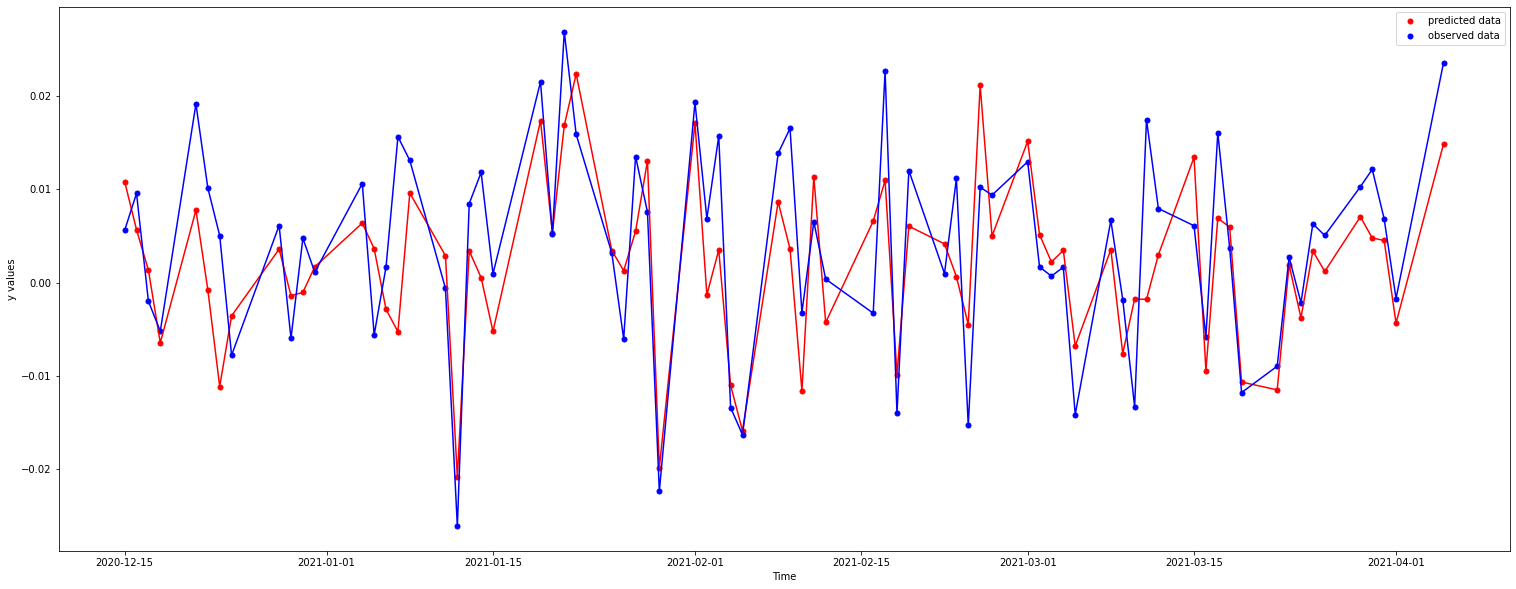

In [29]:
import matplotlib.dates as mdates

fig = plt.figure()
plt.figure(figsize=(26,10))
ax = plt.axes()
plt.xlabel('Time')
plt.ylabel('y values')
var = pph[176:]
var['Date'] = pd.to_datetime(var['Date'])
var.set_index('Date', inplace=True)
plt.plot(var.index, predictions,'.',ms=10, color='r',label="predicted data")
plt.plot(var.index, y_test,'.',ms=10, color='b',label="observed data")

plt.plot(var.index, predictions,color='r')
plt.plot(var.index, y_test, color='b')

ax=plt.axes()
plt.legend()

**Step 3**: Modifying Xes to check for better fit


*   regress Y on individual Xs to see if relationship is linear
*   regress Y on exponential Xs
*   regress Y on Xs squared










In [ ]:
## AZN
# regress Y on AZN alone

AZN_fitted = sm.OLS(y_train, sm.add_constant(X_train['AZN'])).fit()
print(AZN_fitted.summary())

Text(0.5, 1.0, 'AZN residuals')

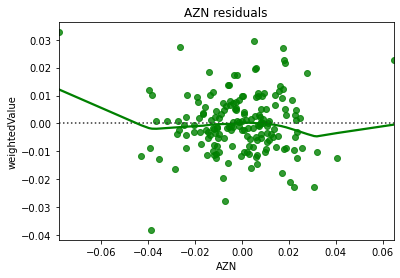

In [70]:
# draw residual plot

sb.residplot(x=X_train['AZN'], y=y_train, lowess=True, color="g")
plt.title('AZN residuals')

In [19]:
# get exponential of AZN

X_train['AZN_exp'] = np.exp(X_train['AZN'])

AZN_exp_fitted = sm.OLS(y_train, sm.add_constant(X_train['AZN_exp'])).fit()
print(AZN_exp_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          weightedValue   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     57.57
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           1.93e-12
Time:                        11:02:21   Log-Likelihood:                 548.29
No. Observations:                 175   AIC:                            -1093.
Df Residuals:                     173   BIC:                            -1086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3461      0.046     -7.585      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# get square of AZN

X_train['AZN_2'] = (X_train['AZN'])**2

AZN_2_fitted = sm.OLS(y_train, sm.add_constant(X_train['AZN_2'])).fit()
print(AZN_2_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          weightedValue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.01504
Date:                Mon, 26 Apr 2021   Prob (F-statistic):              0.903
Time:                        11:02:21   Log-Likelihood:                 523.17
No. Observations:                 175   AIC:                            -1042.
Df Residuals:                     173   BIC:                            -1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.821e-05      0.001     -0.018      0.9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
## GSK

# regress Y on GSK alone

GSK_fitted = sm.OLS(y_train, sm.add_constant(X_train['GSK'])).fit()
print(GSK_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          weightedValue   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     89.73
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           2.06e-17
Time:                        11:02:21   Log-Likelihood:                 559.72
No. Observations:                 175   AIC:                            -1115.
Df Residuals:                     173   BIC:                            -1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.121      0.2

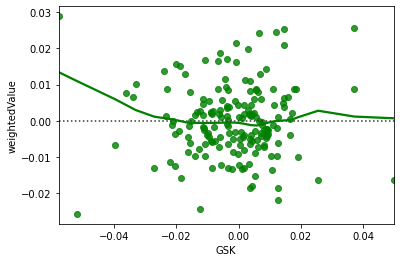

In [74]:
# draw residual plot

sb.residplot(x=X_train['GSK'], y=y_train, lowess=True, color="g")

In [22]:
# get exponential of GSK

X_train['GSK_exp'] = np.exp(X_train['GSK'])

GSK_exp_fitted = sm.OLS(y_train, sm.add_constant(X_train['GSK_exp'])).fit()
print(GSK_exp_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          weightedValue   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     90.02
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           1.88e-17
Time:                        11:02:21   Log-Likelihood:                 559.82
No. Observations:                 175   AIC:                            -1116.
Df Residuals:                     173   BIC:                            -1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5061      0.053     -9.486      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# NVS

# regress Y on NVS alone

NVS_fitted = sm.OLS(y_train, sm.add_constant(X_train['NVS'])).fit()
print(NVS_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          weightedValue   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     89.41
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           2.30e-17
Time:                        11:02:21   Log-Likelihood:                 559.61
No. Observations:                 175   AIC:                            -1115.
Df Residuals:                     173   BIC:                            -1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.248      0.8

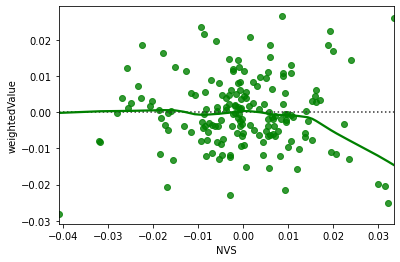

In [77]:
# draw residual plot

sb.residplot(x=X_train['NVS'], y=y_train, lowess=True, color="g")

In [78]:
# PFE

# regress Y on PFE alone

PFE_fitted = sm.OLS(y_train, sm.add_constant(X_train['PFE'])).fit()
print(PFE_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          weightedValue   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     72.81
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           7.01e-15
Time:                        11:02:11   Log-Likelihood:                 553.89
No. Observations:                 175   AIC:                            -1104.
Df Residuals:                     173   BIC:                            -1097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.327      0.7

In [79]:
## transform all X to exponential X

X_train['NVS_exp'] = np.exp(X_train['NVS'])
X_train['PFE_exp'] = np.exp(X_train['PFE'])
X_train['RHHBY_exp'] = np.exp(X_train['RHHBY'])
X_train['TAK_exp'] = np.exp(X_train['TAK'])

y_exp_train = np.exp(y_train)

fitted_new2_model = sm.OLS(y_train, sm.add_constant(X_train[['ABBV','AZN_exp','GSK_exp','JNJ','MRK','NVS_exp','PFE_exp','RHHBY_exp','SNY','TAK_exp']])).fit()
print(fitted_new2_model.summary())

                            OLS Regression Results                            
Dep. Variable:          weightedValue   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     35.14
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           7.80e-36
Time:                        11:02:11   Log-Likelihood:                 623.36
No. Observations:                 175   AIC:                            -1225.
Df Residuals:                     164   BIC:                            -1190.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2126      0.085     -2.502      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [24]:
#checked for multicolinearity; the independent variables are not significantly dependent on each other 

In [81]:
#Regress a single ETF on original equation

import statsmodels.api as sm

fitted_model = sm.OLS(df_Close_Y['PJP'], sm.add_constant(df_Close_X[['ABBV', 'AZN', 'GSK', 'JNJ', 'MRK', 'NVS', 'PFE', 'RHHBY', 'SNY','TAK']])).fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PJP   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     622.1
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          1.96e-165
Time:                        11:02:11   Log-Likelihood:                -400.94
No. Observations:                 251   AIC:                             823.9
Df Residuals:                     240   BIC:                             862.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4668      3.504      3.558      0.0

# Model 2: Weight-Adjusted Model

*   Apply weights, calculated from revenue ratios, to independent variables
*   Re-regress model and re-predict




In [ ]:
#apply weights to Xs
#weights calculated from ratio of net assets of the 10 companies

w_abbv = 0.08
w_azn = 0.06
w_gsk = 0.10
w_jnj = 0.13
w_mrk = 0.11
w_nvs = 0.11
w_pfe = 0.12
w_rhhby = 0.115
w_sny = 0.095
w_tak = 0.07

#generage Xm_train and Xm_test

X_train['ABBV_m'] = w_abbv * X_train['ABBV']
X_train['AZN_m'] = w_azn * X_train['AZN']
X_train['GSK_m'] = w_gsk * X_train['GSK']
X_train['JNJ_m'] = w_jnj * X_train['JNJ']
X_train['MRK_m'] = w_mrk * X_train['MRK']
X_train['NVS_m'] = w_nvs * X_train['NVS']
X_train['PFE_m'] = w_pfe * X_train['PFE']
X_train['RHHBY_m'] = w_rhhby * X_train['RHHBY']
X_train['SNY_m'] = w_sny * X_train['SNY']
X_train['TAK_m'] = w_tak * X_train['TAK']

X_test['ABBV_m'] = w_abbv * X_test['ABBV']
X_test['AZN_m'] = w_azn * X_test['AZN']
X_test['GSK_m'] = w_gsk * X_test['GSK']
X_test['JNJ_m'] = w_jnj * X_test['JNJ']
X_test['MRK_m'] = w_mrk * X_test['MRK']
X_test['NVS_m'] = w_nvs * X_test['NVS']
X_test['PFE_m'] = w_pfe * X_test['PFE']
X_test['RHHBY_m'] = w_rhhby * X_test['RHHBY']
X_test['SNY_m'] = w_sny * X_test['SNY']
X_test['TAK_m'] = w_tak * X_test['TAK']

Xm_train = X_train[['ABBV_m', 'AZN_m', 'GSK_m', 'JNJ_m', 'MRK_m', 'NVS_m', 'PFE_m', 'RHHBY_m', 'SNY_m','TAK_m']]
Xm_test = X_test[['ABBV_m', 'AZN_m', 'GSK_m', 'JNJ_m', 'MRK_m', 'NVS_m', 'PFE_m', 'RHHBY_m', 'SNY_m','TAK_m']]

In [ ]:
fitted_model_m = sm.OLS(y_train, sm.add_constant(Xm_train)).fit()
predictions_m = fitted_model_m.predict(sm.add_constant(Xm_test))
print(predictions_m)
print(fitted_model_m.summary())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

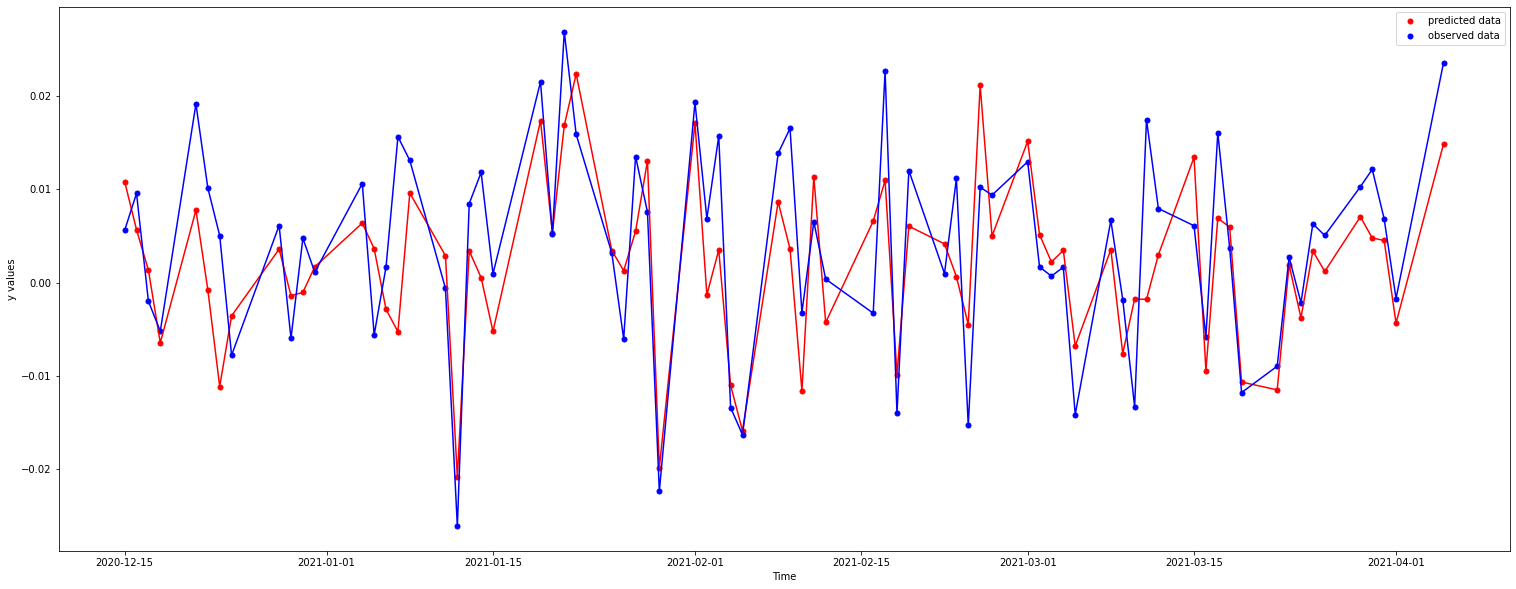

In [34]:

fig = plt.figure()
plt.figure(figsize=(26,10))
ax=plt.axes()
plt.xlabel('Time')
plt.ylabel('y values')
var=pph[176:]
var['Date'] = pd.to_datetime(var['Date'])
var.set_index('Date', inplace=True)
plt.plot(var.index, predictions_m,'.',ms=10, color='r',label="predicted data")
plt.plot(var.index, y_test,'.',ms=10, color='b',label="observed data")

plt.plot(var.index, predictions_m,color='r')
plt.plot(var.index, y_test, color='b')

ax=plt.axes()
plt.legend()